In [1]:
import glob
import pandas as pd

In [2]:
#importlib code just for debugging : to allow changes in scripts we are imporing from
#reflect here. It can be removed if you are not making changes to the scripts we are imporing from

import importlib ##can remove
import graphing_config as GC
import or_common as orc
importlib.reload(GC) ##can remove
importlib.reload(orc) ##can remove

<module 'or_common' from '/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/5.graphs/odds_ratio/or_common.py'>

In [3]:
phylop_pleio=pd.read_csv(glob.glob(GC.data_base_path+"phylop_pleio/*.csv")[0])

In [4]:
#a can have multiple states, b has just two.
or_column_a="pleio"
or_column_b="phylop_significant"
a_vals=phylop_pleio[or_column_a].unique()


final=[]

for region in GC.genome_regions:
    working=phylop_pleio
    if region != "ALL":
        working=phylop_pleio[(phylop_pleio[region]==True)]
    working=working[["pleio","phylop_significant","count"]]
    
    for a_val in a_vals:
        ret=orc.compute_OR(df=working,
                   a=or_column_a,
                   a_val=a_val,
                   b=or_column_b,
                   b_val=True)
        ret[or_column_a]=a_val
        ret["region"]=region
        final.append(ret)
        
df=pd.DataFrame(final)

[[  19225  262848]
 [  58033 1510568]]
1.9038245819818955
[[  18953  263120]
 [  35619 1532982]]
3.100126639881894
[[ 235942   46131]
 [1454337  114264]]
0.4018433237749673
[[   7953  274120]
 [  20612 1547989]]
2.1789034964282368
[[   76971  3707806]
 [ 1175313 68661109]]
1.212739155926052
[[   33081  3751696]
 [  491287 69345135]]
1.244605496620347
[[ 3646975   137802]
 [67760468  2075954]]
0.8108090631651834
[[   27750  3757027]
 [  409354 69427068]]
1.2527039812113183
[[   22170   631494]
 [  190070 10009560]]
1.848833820461158
[[   14781   638883]
 [   91009 10108621]]
2.569745157771141
[[ 608043   45621]
 [9852259  347371]]
0.4699235727893439
[[    8670   644994]
 [   66292 10133338]]
2.0547303223907942
[[   157513  11641122]
 [  3872008 498392322]]
1.7416330589137548
[[    79679  11718956]
 [  1592562 500671768]]
2.1375274734339236
[[ 11505004    293631]
 [495497298   6767032]]
0.5351084504751399
[[    56439  11742196]
 [  1302462 500961868]]
1.8487134173145445


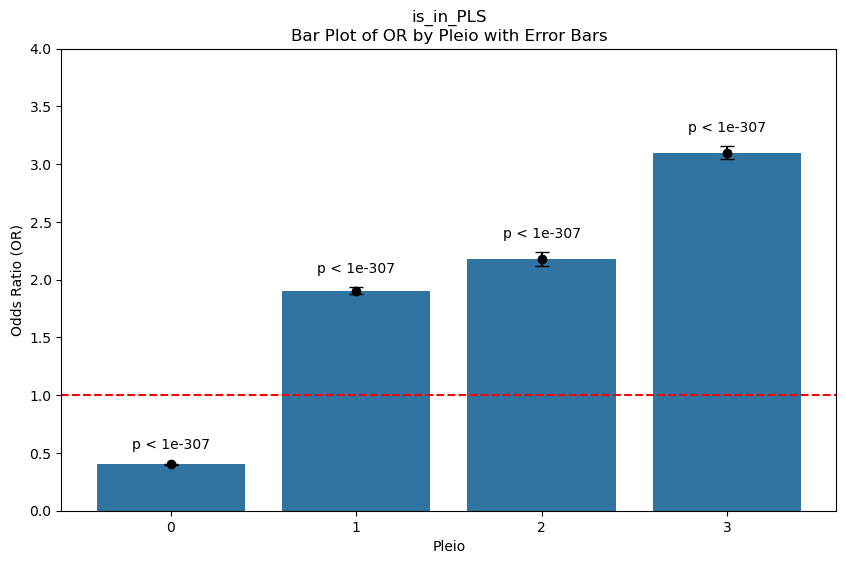

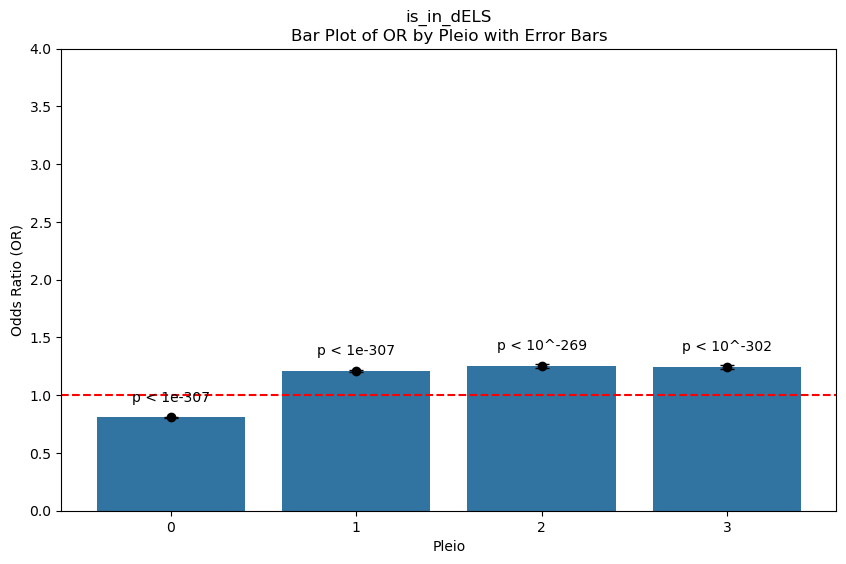

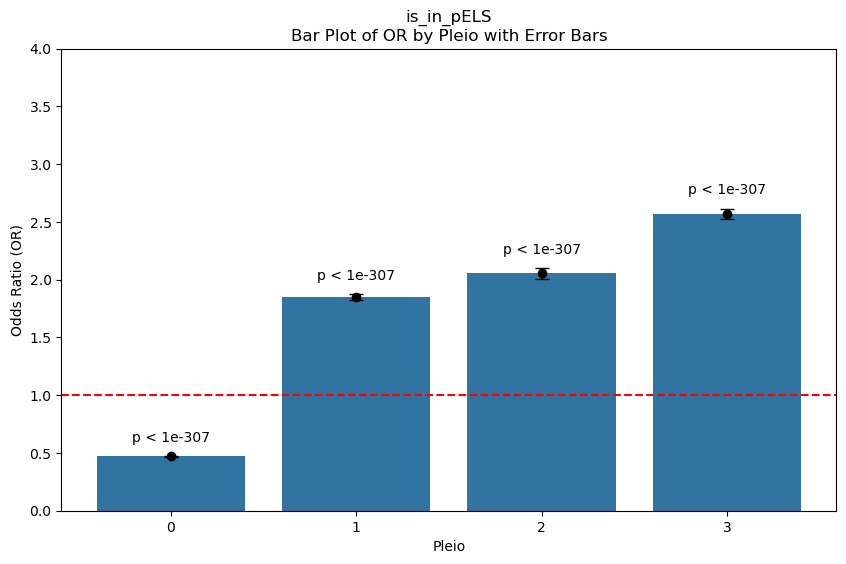

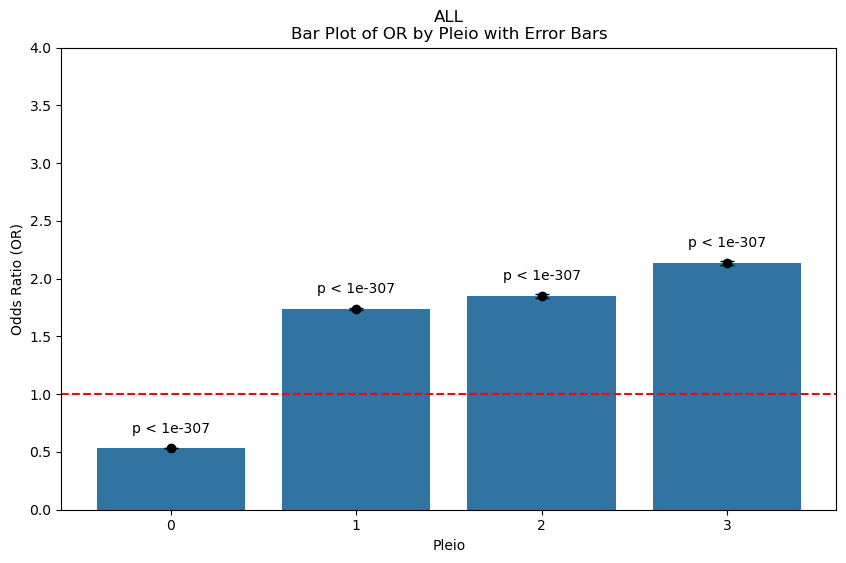

In [5]:
for region in GC.genome_regions:

    temp=df[df["region"]==region]
    
    orc.plot_or(df=temp,
                x='pleio',
                y='OR',
                xlabel='Pleio',
                ylim=4.0,
                title=f'{region}\nBar Plot of OR by Pleio with Error Bars')    